# **Determining the Most Valuable Data Science Skills**
by Gullit Navarrete

**Abstract:**
The goal of this project and to be shown verbally through my presentation is to display the most valuable skills in the data science industry/field. I intend to do this with my research question including the methods of which will be summary statistics and visualizations upon cleaning and tidying up the data beforehand. Afterwards, I'll base my conclusions on the findings of these statistics and visual representation of value.

**Introduction:**
Research Question: "What are the top 5 most valued data science skills (Programming languages and Machine Learning Tools/algorithms) in the United States of America?”
Relevance: May be used as guidance on the path to entering this job field as well as aligning employees and employers on what is typically sought after among the industry.

**Data Import:**

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/GullitNa/DATA602-FINAL/main/kaggle_survey_2020_responses%202.csv"
df = pd.read_csv(url, header=1)
df.columns = df.columns.str.strip().str.replace("\n", " ")
df.dropna(axis=1, how="all", inplace=True)
df.head()

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Neptune.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Weights & Biases","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Trains","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
0,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Data Wrangling:**After the initial observation, I will now further clean out the data from "NA" values and most importantly, enable questions 7 and 17 to be read directly into a sum of their counts for summary statistics and eventually plotting.

In [25]:
print('\n'.join(f"{i:3d} │ {col!r}" for i, col in enumerate(df.columns[:10])))

  0 │ 'Duration (in seconds)'
  1 │ 'What is your age (# years)?'
  2 │ 'What is your gender? - Selected Choice'
  3 │ 'In which country do you currently reside?'
  4 │ 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'
  5 │ 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice'
  6 │ 'For how many years have you been writing code and/or programming?'
  7 │ 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python'
  8 │ 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R'
  9 │ 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL'


In [26]:
# Rename the key columns that we care about
df.rename(columns={
    "Select the title most similar to your current role (or most recent title if retired): - Selected Choice": "job_title",
    "In which country do you currently reside?":                                "country",
    "What is your current yearly compensation (approximate $USD)?":             "salary",
    "What is the highest level of formal education that you have attained or plan to attain within the next 2 years?": "education"
}, inplace=True)

# Drop rows with missing salary
df = df[df["salary"].notna()]

# US only based on research questionn
df = df[df["country"] == "United States of America"]

The code below is how I intend to prepare the data for the analysis that will take place. By identifying the questionaires fill out form in a "1" and "0" binary format to be read.

      Language  Count  Percent
0       Python   1170    78.84
1          SQL    818    55.12
2            R    507    34.16
3         Bash    286    19.27
4        Other    247    16.64
5   Javascript    237    15.97
6         Java    187    12.60
7          C++    159    10.71
8       MATLAB    123     8.29
9            C    110     7.41
10       Julia     35     2.36
11       Swift     20     1.35


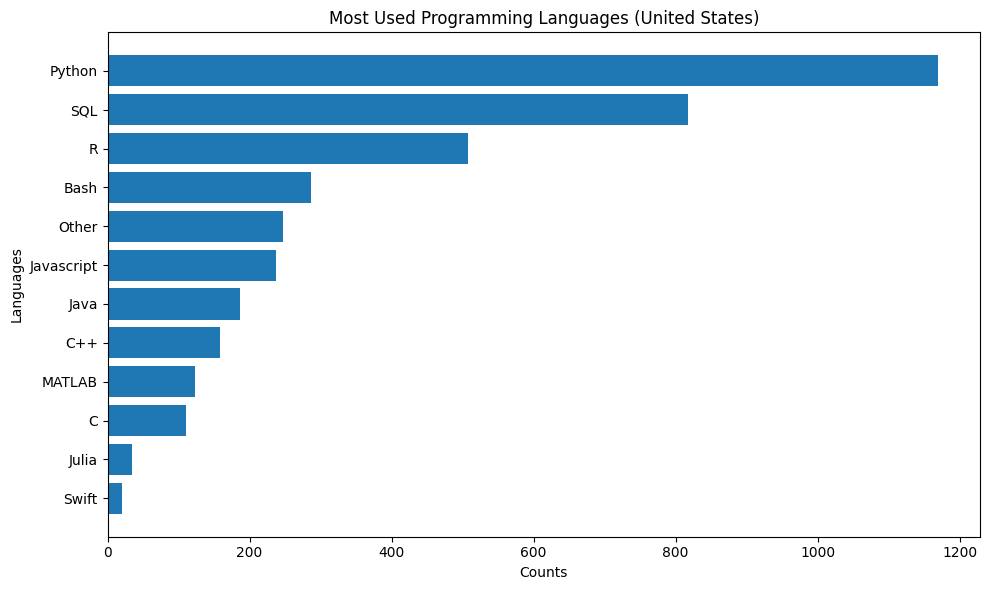

In [27]:
# Identify your Q7 (programming langs) & Q17 (ML algorithms) columns by their question text
prog_cols = [c for c in df.columns
             if c.startswith("What programming languages do you use on a regular basis")]
ml_cols   = [c for c in df.columns
             if c.startswith("Which of the following ML algorithms do you use on a regular basis")]

# Replace "None" with actual NA, then binarize in one shot
df[prog_cols] = df[prog_cols].replace("None", pd.NA)     # treat “None of the above” as missing
df[prog_cols] = df[prog_cols].notna().astype(int)        # 1 if language selected, 0 otherwise

df[ml_cols] = df[ml_cols].replace("None", pd.NA)
df[ml_cols] = df[ml_cols].notna().astype(int)

# Now can sum exactly as rowSums()
df["total_prog_skills"] = df[prog_cols].sum(axis=1)
df["total_ml_skills"]   = df[ml_cols].sum(axis=1)
df["total_skills"]      = df["total_prog_skills"] + df["total_ml_skills"]

# And later count & plot
counts = df[prog_cols].sum().sort_values(ascending=False)
total  = len(df)
summary = pd.DataFrame({
    "Language": [c.split(" - Selected Choice - ")[-1] for c in counts.index],
    "Count":    counts.values,
    "Percent":  (counts.values/total*100).round(2)
})
print(summary)
plt.figure(figsize=(10, 6))
plt.barh(summary["Language"][::-1], summary["Count"][::-1])
plt.title("Most Used Programming Languages (United States)")
plt.ylabel("Languages")
plt.xlabel("Counts")
plt.tight_layout()
plt.show()

Here is further testing to see if everything went through and if it truly is binarized.

In [28]:
print(df[prog_cols].head())

    What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python  \
1                                                   1                                                              
3                                                   1                                                              
11                                                  0                                                              
24                                                  1                                                              
34                                                  0                                                              

    What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R  \
1                                                   1                                                         
3                                                   0                            

In [29]:
print(total)

1484


**Most Used Machine Learning Tools:** Here's a repitition of what was done for "Language" or the initial prog_cols dataframe, but with ml_cols instead for the machine learning tools that the respondents were questioned on.

                                            ML Tool  Count  Percent
                      Linear or Logistic Regression   1012    68.19
                   Decision Trees or Random Forests    845    56.94
Gradient Boosting Machines (xgboost, lightgbm, etc)    546    36.79
                      Convolutional Neural Networks    438    29.51
                                Bayesian Approaches    410    27.63
                  Dense Neural Networks (MLPs, etc)    277    18.67
                          Recurrent Neural Networks    250    16.85
            Transformer Networks (BERT, gpt-3, etc)    147     9.91
                    Generative Adversarial Networks     93     6.27
                            Evolutionary Approaches     61     4.11
                                              Other     48     3.23


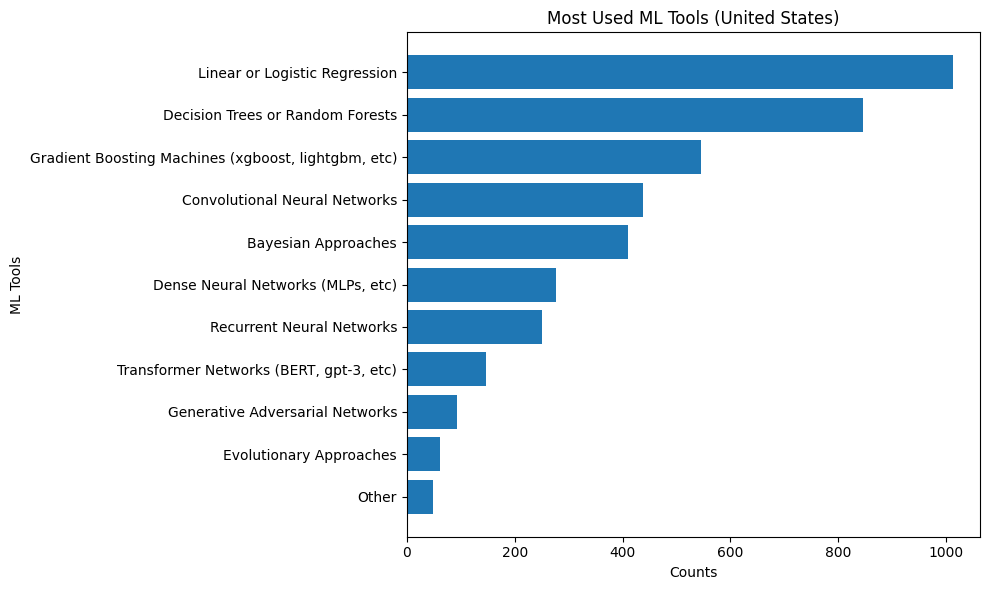

In [30]:
# Same as before but for Machine Learning Tools, for summary and plotting
counts_ml = df[ml_cols].sum().sort_values(ascending=False)
total     = len(df)

summary_ml = pd.DataFrame({
    "ML Tool": [c.split(" - Selected Choice - ")[-1] for c in counts_ml.index],
    "Count":   counts_ml.values,
    "Percent": (counts_ml.values/total*100).round(2)
})
print(summary_ml.to_string(index=False))

plt.figure(figsize=(10, 6))
plt.barh(summary_ml["ML Tool"][::-1], summary_ml["Count"][::-1])
plt.title("Most Used ML Tools (United States)")
plt.ylabel("ML Tools")
plt.xlabel("Counts")
plt.tight_layout()
plt.show()

**Most Used Programming Languages by Job Title:**

                job_title   Language  Count  Percent
         Business Analyst     Python     54    30.51
    DBA/Database Engineer     Python     14    34.15
             Data Analyst     Python    127    31.59
            Data Engineer     Python     54    31.21
           Data Scientist     Python    324    33.26
Machine Learning Engineer     Python     85    35.86
  Product/Project Manager     Python     70    30.57
       Research Scientist     Python     97    32.23
        Software Engineer     Python    139    24.91
             Statistician     Python     18    26.87
         Business Analyst          R     32    18.08
    DBA/Database Engineer          R      4     9.76
             Data Analyst          R     77    19.15
            Data Engineer          R     19    10.98
           Data Scientist          R    164    16.84
Machine Learning Engineer          R     18     7.59
  Product/Project Manager          R     26    11.35
       Research Scientist          R     48   

<Figure size 1200x800 with 0 Axes>

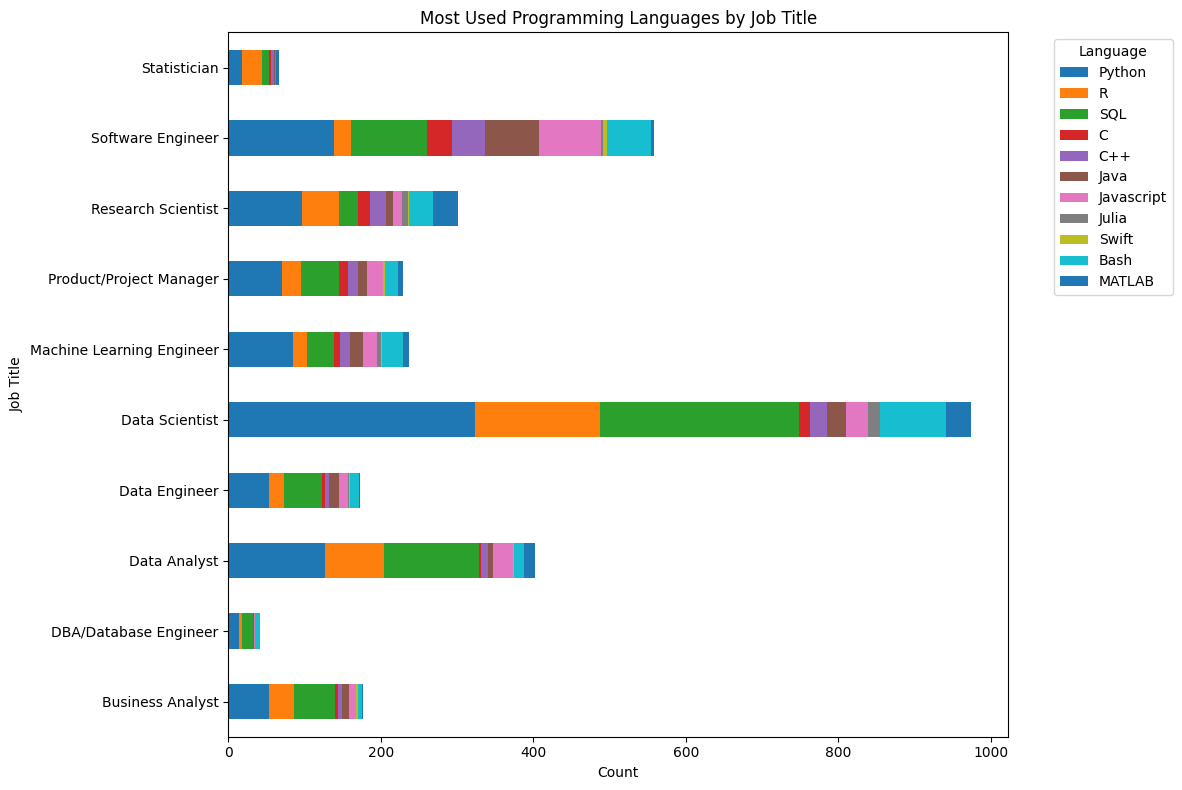

In [31]:
# "Other" was kept to show the overall counts within the industry. For the sake of clarity and transparency, I will remove "Other" for further analysis.
df = df[df["job_title"] != "Other"].copy()

# This is to reduce the size of Q7 column names, because my early testing lacked space for the graph
lang_map = {
    col: col.split(" - Selected Choice - ")[-1]
    for col in prog_cols
    if not col.endswith(" - Selected Choice - Other")
}
df.rename(columns=lang_map, inplace=True)

# Update prog_cols to the new short names (and exclude “Other”)
prog_cols_short = list(lang_map.values())

# Regroup by job_title and sum
counts_by_job = df.groupby("job_title")[prog_cols_short].sum()

# Build & print summary table
summary = (
    counts_by_job
      .reset_index()
      .melt(id_vars="job_title", var_name="Language", value_name="Count")
)
total_per_job = counts_by_job.sum(axis=1)
summary["Percent"] = summary.apply(
    lambda r: (r["Count"] / total_per_job[r["job_title"]] * 100).round(2),
    axis=1
)
print(summary.to_string(index=False))

plt.figure(figsize=(12, 8))
counts_by_job.plot(
    kind="barh",
    stacked=True,
    figsize=(12, 8),
    legend=True
)
plt.title("Most Used Programming Languages by Job Title")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.legend(title="Language", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

**Most Used Machine Learning Tools by Job Title:**

                job_title                                             ML Tool  Count  Percent
         Business Analyst                       Linear or Logistic Regression     46    31.08
    DBA/Database Engineer                       Linear or Logistic Regression      7    33.33
             Data Analyst                       Linear or Logistic Regression    113    33.53
            Data Engineer                       Linear or Logistic Regression     46    28.22
           Data Scientist                       Linear or Logistic Regression    319    23.22
Machine Learning Engineer                       Linear or Logistic Regression     68    18.13
  Product/Project Manager                       Linear or Logistic Regression     57    28.08
       Research Scientist                       Linear or Logistic Regression     86    20.28
        Software Engineer                       Linear or Logistic Regression     95    23.00
             Statistician                       Linear or Lo

<Figure size 1200x800 with 0 Axes>

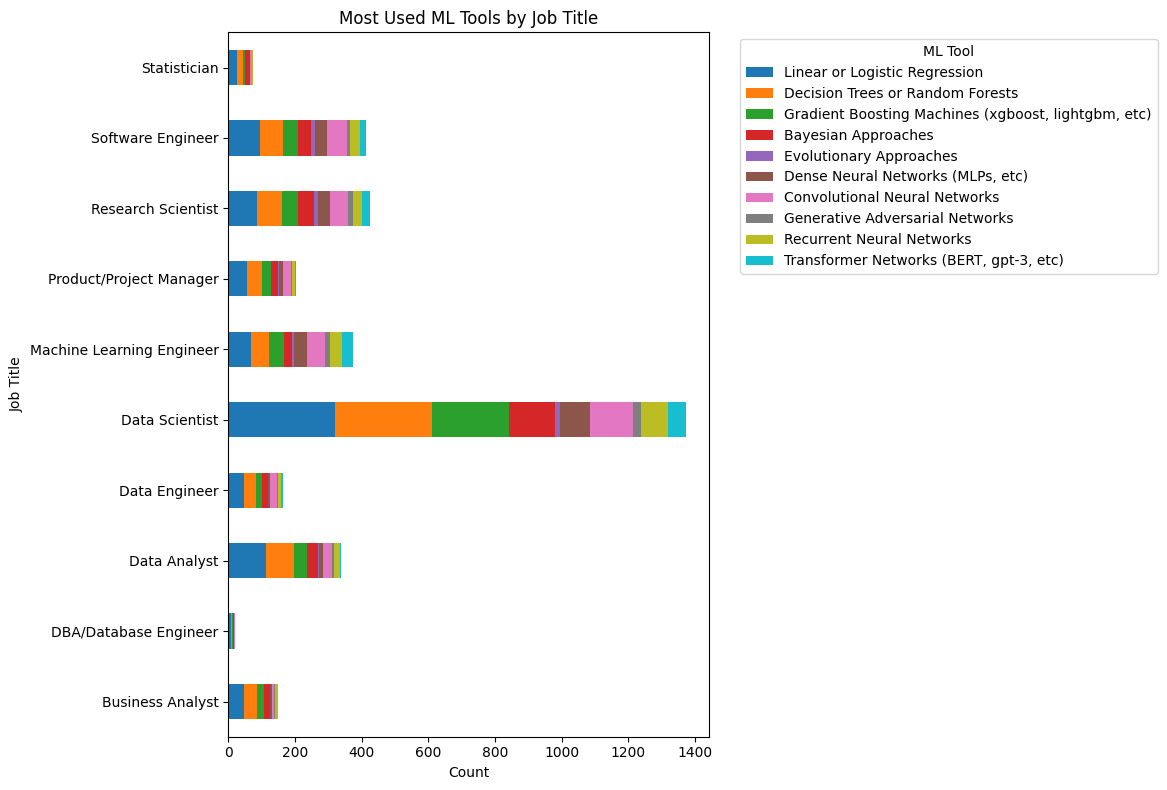

In [32]:
ml_map = {
    col: col.split(" - Selected Choice - ")[-1]
    for col in ml_cols
    if not col.endswith(" - Selected Choice - Other")
}

df.rename(columns=ml_map, inplace=True)

# New list of short ML‐tool column names
ml_tools = list(ml_map.values())

# Group & sum by job_title
counts_ml_by_job = df.groupby("job_title")[ml_tools].sum()

# Build & print the summary table
summary_ml = (
    counts_ml_by_job
      .reset_index()
      .melt(id_vars="job_title", var_name="ML Tool", value_name="Count")
)
totals_per_job = counts_ml_by_job.sum(axis=1)
summary_ml["Percent"] = summary_ml.apply(
    lambda r: (r["Count"] / totals_per_job[r["job_title"]] * 100).round(2),
    axis=1
)
print(summary_ml.to_string(index=False))

# Plot the stacked horizontal bar chart
plt.figure(figsize=(12, 8))
counts_ml_by_job.plot(
    kind="barh",
    stacked=True,
    figsize=(12, 8),
    legend=True
)
plt.title("Most Used ML Tools by Job Title")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.legend(title="ML Tool", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

**Salary:**
My solution to display the salary ranges of the respondents are by keeping these salary ranges from its initial string format rather than numerically and converting these ranges into singular midpoints.
Why? Because having non-numeric, ordered categories. A bar chart (especially horizontal) lets you see at a glance which pay bands are most common.

As well as the research question receiving a broad answer rather than a miss/less accurate response about ranges themselves, a categorical bar chart is clearer for this case.

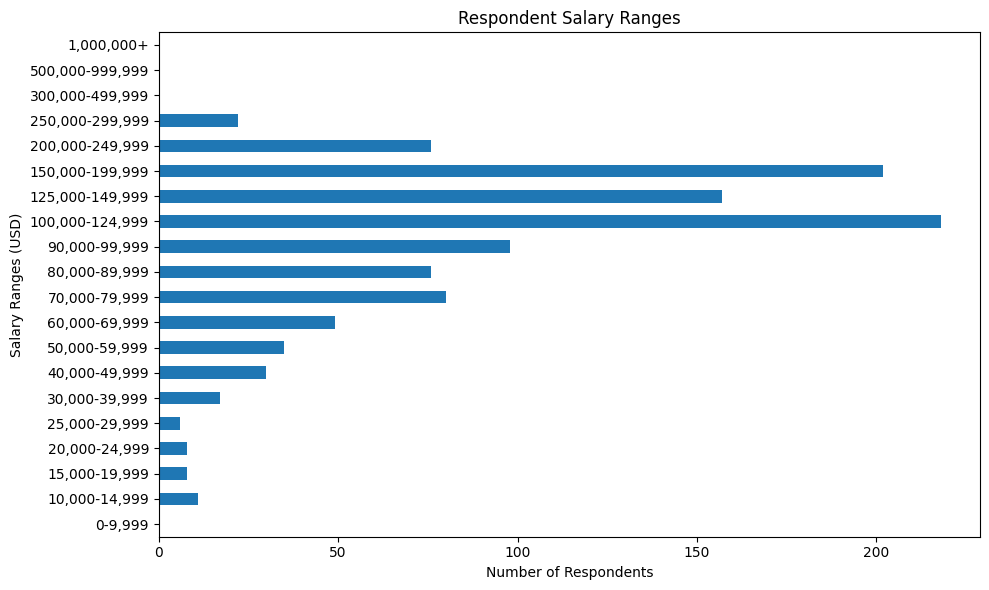

In [33]:
salary_order = [
    "0-9,999", "10,000-14,999", "15,000-19,999", "20,000-24,999",
    "25,000-29,999", "30,000-39,999", "40,000-49,999", "50,000-59,999",
    "60,000-69,999", "70,000-79,999", "80,000-89,999", "90,000-99,999",
    "100,000-124,999", "125,000-149,999", "150,000-199,999", "200,000-249,999",
    "250,000-299,999", "300,000-499,999", "500,000-999,999", "1,000,000+"
]

# salary column to Categorical with this new order
df['salary_band'] = pd.Categorical(df['salary'], categories=salary_order, ordered=True)

# Compute counts per band
counts = df['salary_band'].value_counts().sort_index()

# Plot a horizontal bar chart
plt.figure(figsize=(10,6))
counts.plot.barh()
plt.title("Respondent Salary Ranges")
plt.xlabel("Number of Respondents")
plt.ylabel("Salary Ranges (USD)")
plt.tight_layout()
plt.show()

**Programming Languages by Salary Range:**
These ranges are will be changed to not include the ranges without any counts from American respondents (removed "0-9,999", "300,000-499,999", "500,000-999,999", and "1,000,000+")

    salary_band   Language  Count  Percent
  10,000-14,999     Python     10    33.33
  15,000-19,999     Python      7    35.00
  20,000-24,999     Python      7    31.82
  25,000-29,999     Python      6    33.33
  30,000-39,999     Python     13    28.26
  40,000-49,999     Python     20    33.33
  50,000-59,999     Python     25    31.25
  60,000-69,999     Python     36    30.51
  70,000-79,999     Python     58    28.71
  80,000-89,999     Python     56    31.46
  90,000-99,999     Python     75    30.99
100,000-124,999     Python    171    30.98
125,000-149,999     Python    132    31.81
150,000-199,999     Python    170    32.02
200,000-249,999     Python     66    31.28
250,000-299,999     Python     19    28.79
  10,000-14,999          R      4    13.33
  15,000-19,999          R      3    15.00
  20,000-24,999          R      3    13.64
  25,000-29,999          R      2    11.11
  30,000-39,999          R      8    17.39
  40,000-49,999          R     11    18.33
  50,000-59

<ipython-input-34-e48e596b4026>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_by_salary = df.groupby('salary_band')[prog_cols_short].sum()


<Figure size 1000x800 with 0 Axes>

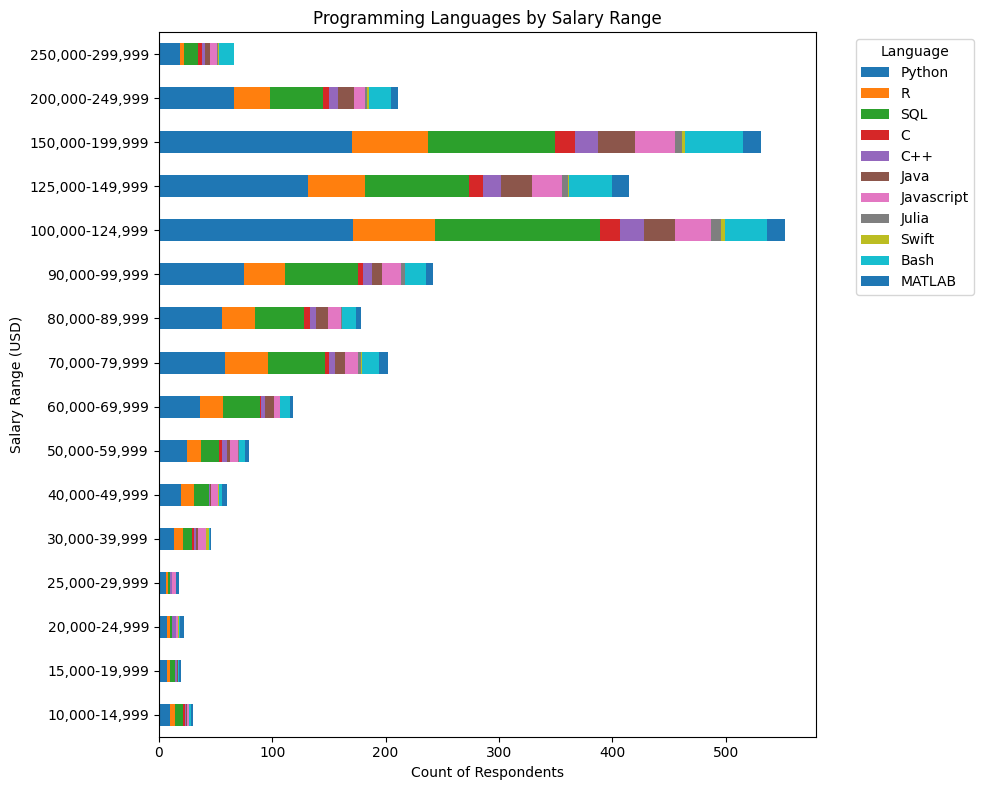

In [34]:
salary_order = [
    "10,000-14,999", "15,000-19,999", "20,000-24,999",
    "25,000-29,999", "30,000-39,999", "40,000-49,999",
    "50,000-59,999", "60,000-69,999", "70,000-79,999",
    "80,000-89,999", "90,000-99,999", "100,000-124,999",
    "125,000-149,999", "150,000-199,999", "200,000-249,999",
    "250,000-299,999"
]

# Cast as ordered categorical, filtering out unwanted bands:
df['salary_band'] = pd.Categorical(
    df['salary'],
    categories=salary_order,
    ordered=True
)
df = df[df['salary_band'].notna()]  # drops any outside the above list

# Group by salary_band and sum your binary prog_cols_short
counts_by_salary = df.groupby('salary_band')[prog_cols_short].sum()

# Build & print a long‐form summary table
summary_salary = (
    counts_by_salary
      .reset_index()
      .melt(id_vars='salary_band', var_name='Language', value_name='Count')
)
totals_per_band = counts_by_salary.sum(axis=1)
summary_salary['Percent'] = (
    summary_salary.apply(
      lambda r: (r['Count'] / totals_per_band[r['salary_band']]) * 100,
      axis=1
    ).round(2)
)
print(summary_salary.to_string(index=False))

# Plot stacked horizontal bars:
plt.figure(figsize=(10, 8))
counts_by_salary.plot(
    kind='barh',
    stacked=True,
    figsize=(10, 8),
    legend=True
)
plt.title("Programming Languages by Salary Range")
plt.xlabel("Count of Respondents")
plt.ylabel("Salary Range (USD)")
plt.legend(title="Language", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**ML Tools by Salary Range:**

    salary_band                                             ML Tool  Count  Percent
  10,000-14,999                       Linear or Logistic Regression      6    25.00
  15,000-19,999                       Linear or Logistic Regression      5    27.78
  20,000-24,999                       Linear or Logistic Regression      7    24.14
  25,000-29,999                       Linear or Logistic Regression      4    23.53
  30,000-39,999                       Linear or Logistic Regression     12    41.38
  40,000-49,999                       Linear or Logistic Regression     18    29.51
  50,000-59,999                       Linear or Logistic Regression     19    25.68
  60,000-69,999                       Linear or Logistic Regression     32    29.36
  70,000-79,999                       Linear or Logistic Regression     59    27.96
  80,000-89,999                       Linear or Logistic Regression     48    25.81
  90,000-99,999                       Linear or Logistic Regression     67  

<ipython-input-35-fe14f4597f45>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_ml_by_salary = df.groupby('salary_band')[ml_tools].sum()


<Figure size 1000x800 with 0 Axes>

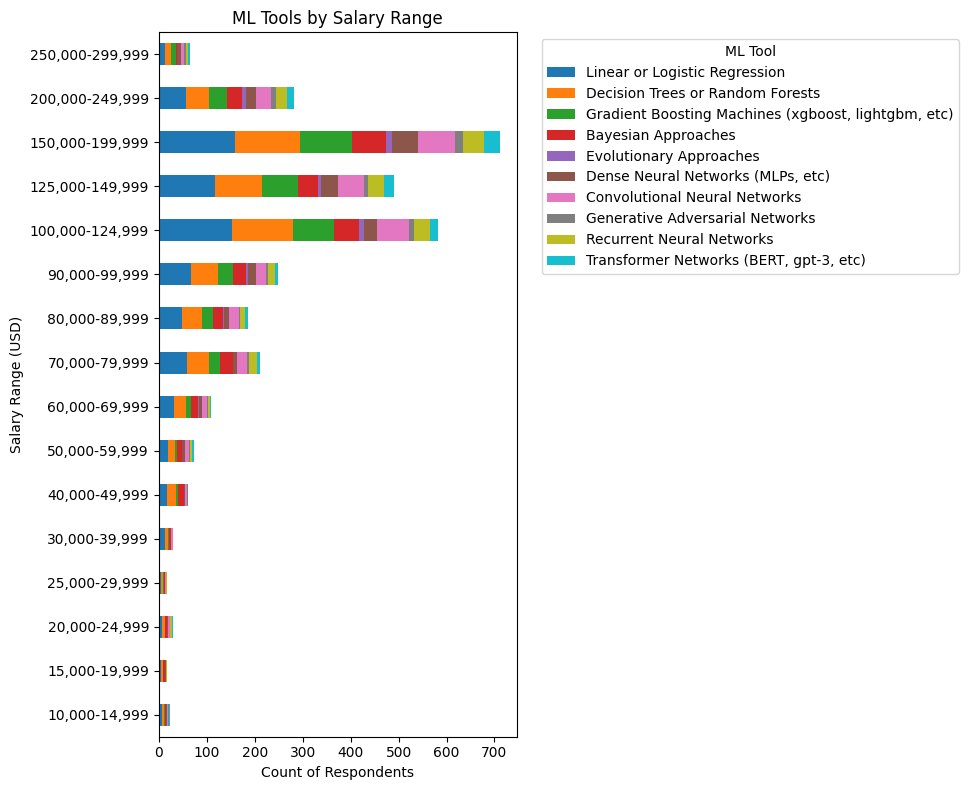

In [35]:
counts_ml_by_salary = df.groupby('salary_band')[ml_tools].sum()

summary_ml_salary = (
    counts_ml_by_salary
      .reset_index()
      .melt(id_vars='salary_band', var_name='ML Tool', value_name='Count')
)
totals_per_band_ml = counts_ml_by_salary.sum(axis=1)
summary_ml_salary['Percent'] = summary_ml_salary.apply(
    lambda r: (r['Count'] / totals_per_band_ml[r['salary_band']] * 100).round(2),
    axis=1
)
print(summary_ml_salary.to_string(index=False))

# Plot
plt.figure(figsize=(10, 8))
counts_ml_by_salary.plot(
    kind='barh',
    stacked=True,
    figsize=(10, 8),
    legend=True
)
plt.title("ML Tools by Salary Range")
plt.xlabel("Count of Respondents")
plt.ylabel("Salary Range (USD)")
plt.legend(title="ML Tool", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Salary Range by Education Level:**

<ipython-input-36-4f7a0b38c246>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  edu_counts = df.groupby(['salary_band', 'education']).size().unstack(fill_value=0)


    salary_band                                                   Education Level  Count  Percent
  10,000-14,999                                                 Bachelor’s degree      0     0.00
  15,000-19,999                                                 Bachelor’s degree      2    25.00
  20,000-24,999                                                 Bachelor’s degree      2    25.00
  25,000-29,999                                                 Bachelor’s degree      2    33.33
  30,000-39,999                                                 Bachelor’s degree      8    47.06
  40,000-49,999                                                 Bachelor’s degree      8    26.67
  50,000-59,999                                                 Bachelor’s degree     10    28.57
  60,000-69,999                                                 Bachelor’s degree     14    28.57
  70,000-79,999                                                 Bachelor’s degree     19    23.75
  80,000-89,999     

<Figure size 1000x800 with 0 Axes>

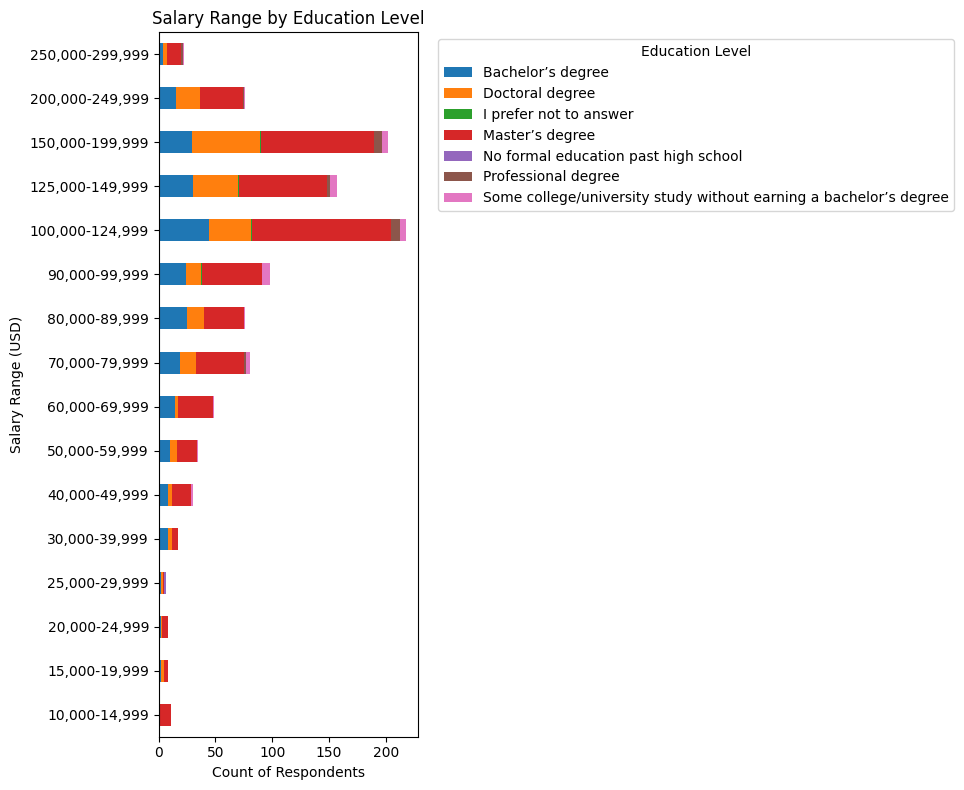

In [36]:
edu_counts = df.groupby(['salary_band', 'education']).size().unstack(fill_value=0)

summary_edu_salary = (
    edu_counts
      .reset_index()
      .melt(id_vars='salary_band', var_name='Education Level', value_name='Count')
)
# Compute percent within each salary band
totals_per_band = edu_counts.sum(axis=1)
summary_edu_salary['Percent'] = summary_edu_salary.apply(
    lambda row: (row['Count'] / totals_per_band[row['salary_band']] * 100).round(2),
    axis=1
)

print(summary_edu_salary.to_string(index=False))

# Plot
plt.figure(figsize=(10, 8))
edu_counts.plot(
    kind='barh',
    stacked=True,
    figsize=(10, 8),
    legend=True
)
plt.title("Salary Range by Education Level")
plt.xlabel("Count of Respondents")
plt.ylabel("Salary Range (USD)")
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Education Level by Programming Language:**

                                                        education   Language  Count  Percent
                                                Bachelor’s degree     Python    180    31.63
                                                  Doctoral degree     Python    174    29.85
                                           I prefer not to answer     Python      2    18.18
                                                  Master’s degree     Python    469    31.95
                             No formal education past high school     Python      1   100.00
                                              Professional degree     Python     17    29.82
Some college/university study without earning a bachelor’s degree     Python     28    27.45
                                                Bachelor’s degree          R     54     9.49
                                                  Doctoral degree          R    104    17.84
                                           I prefer not to answer     

<Figure size 1200x800 with 0 Axes>

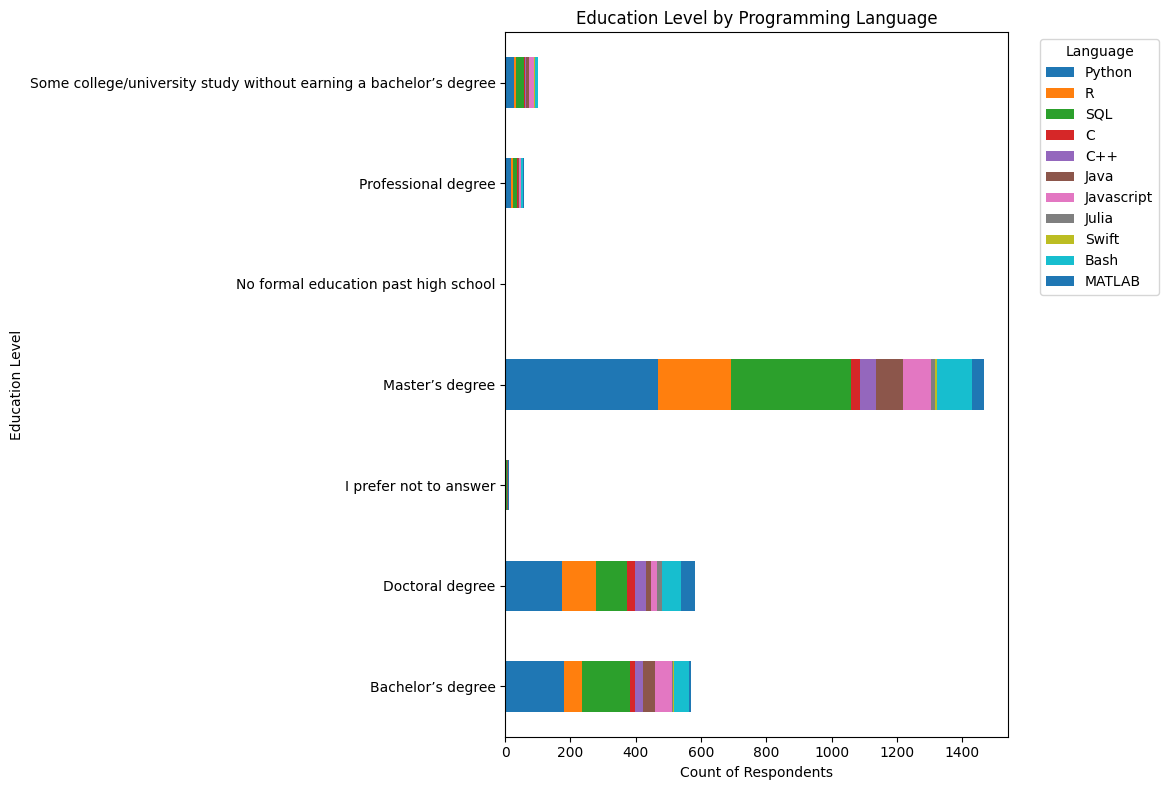

In [37]:
edu_counts_lang = df.groupby('education')[prog_cols_short].sum()

summary_lang_edu = (
    edu_counts_lang
      .reset_index()
      .melt(id_vars='education', var_name='Language', value_name='Count')
)
totals_per_edu = edu_counts_lang.sum(axis=1)
summary_lang_edu['Percent'] = summary_lang_edu.apply(
    lambda row: (row['Count'] / totals_per_edu[row['education']] * 100).round(2),
    axis=1
)
print(summary_lang_edu.to_string(index=False))

plt.figure(figsize=(12, 8))
edu_counts_lang.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 8),
    legend=True
)
plt.title("Education Level by Programming Language")
plt.xlabel("Count of Respondents")
plt.ylabel("Education Level")
plt.legend(title="Language", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Education Level by ML Tools:**

                                                        education                                             ML Tool  Count  Percent
                                                Bachelor’s degree                       Linear or Logistic Regression    137    26.00
                                                  Doctoral degree                       Linear or Logistic Regression    180    22.78
                                           I prefer not to answer                       Linear or Logistic Regression      3    23.08
                                                  Master’s degree                       Linear or Logistic Regression    416    25.20
                             No formal education past high school                       Linear or Logistic Regression      0      NaN
                                              Professional degree                       Linear or Logistic Regression     15    21.74
Some college/university study without earning a bachelor’s deg

<ipython-input-38-f2a3b289a730>:10: RuntimeWarning: invalid value encountered in scalar divide
  lambda r: (r['Count'] / totals_per_edu_ml[r['education']] * 100).round(2),


<Figure size 1200x800 with 0 Axes>

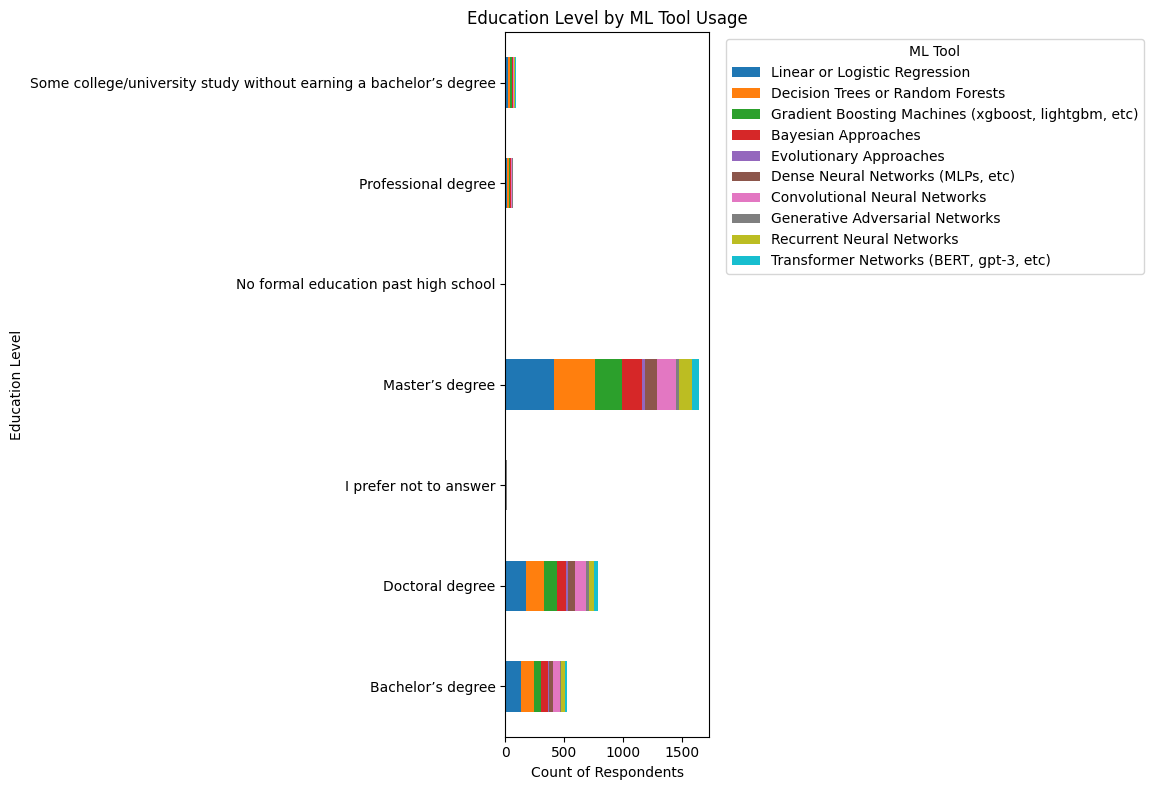

In [38]:
edu_counts_ml = df.groupby('education')[ml_tools].sum()

summary_ml_edu = (
    edu_counts_ml
      .reset_index()
      .melt(id_vars='education', var_name='ML Tool', value_name='Count')
)
totals_per_edu_ml = edu_counts_ml.sum(axis=1)
summary_ml_edu['Percent'] = summary_ml_edu.apply(
    lambda r: (r['Count'] / totals_per_edu_ml[r['education']] * 100).round(2),
    axis=1
)
print(summary_ml_edu.to_string(index=False))
plt.figure(figsize=(12, 8))
edu_counts_ml.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 8),
    legend=True
)
plt.title("Education Level by ML Tool Usage")
plt.xlabel("Count of Respondents")
plt.ylabel("Education Level")
plt.legend(title="ML Tool", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **Conclusion:**

Based on the various visualizations throughout this project, we can infer that programming proficiency in Python and SQL are the two most consistently used skills and its popularity remains within the most used Programming Languages, right next to R, referred as also playing a strong role for many professionals. Neural networks, decision trees, gradient boosting methods, and linear/logistic regression are some of the machine learning tools and techniques that seem to be frequently utilized and appreciated. Stronger backgrounds in these programming languages and machine learning frameworks are frequently and clearly associated with better wages, and many respondents in higher salary categories have at least a bachelor's or master's degree (majority of the counts and upper salary brackets have a master's degree). The findings suggest that the most sought after set of data science competencies is a strong foundation in Python, SQL, and fundamental machine learning algorithms particularly those using linear regression, neural networks and tree-based approaches.